In [1]:
import os
import matplotlib.pyplot as plt
import torch

In [2]:
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc("axes", labelsize=8)
plt.rc("legend", fontsize=8)

In [3]:
def plot_regret(regret, color=None, label=None, n_std=1, alpha=0.3, lw=1, accumulate=False):
    iterations = torch.arange(regret.shape[1]) + 1
    
    cumulative_regret = regret.cpu().cumsum(dim=1)
    if accumulate:
        regret_mean = cumulative_regret.mean(dim=0)/iterations
        regret_std = (cumulative_regret/iterations).std(dim=0)
    else:
        regret_mean = cumulative_regret.mean(dim=0)
        regret_std = cumulative_regret.std(dim=0)
    
    plt.plot(iterations, regret_mean, c=color, label=label, lw=lw)
    plt.fill_between(iterations, regret_mean - n_std*regret_std, regret_mean + n_std*regret_std, 
                     color=color, alpha=alpha)
 

In [4]:
def plot_regrets(regrets_dict: dict, c_map, n_iterations=100, accumulate=False):
    plt.figure(figsize=(3,2))
    for nm, r_t in regrets_dict.items():
        plot_regret(r_t, color=next(c_map), label=nm, lw=1.5, accumulate=accumulate)
    plt.legend(loc="upper right")
    plt.xlabel("Iterations")
    plt.ylabel("Cumulative regret")
    plt.xlim(0, n_iterations)
    plt.tight_layout()

# Toy experiment

In [5]:
results_dir = "."
method_names = ["GP-UCB", "CME-UCB", "I-CME-UCB"]
regrets = dict.fromkeys(method_names)

for name in method_names:
    regrets[name] = torch.load(os.path.join(results_dir, "{}-regret.pth".format(name.lower())))
    

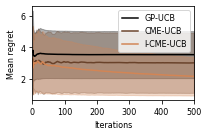

In [6]:
colormap = iter(plt.cm.copper(torch.linspace(0,1,len(method_names)+1).numpy()))
plot_regrets(regrets, colormap, n_iterations=500, accumulate=True)
plt.ylabel("Mean regret")
plt.tight_layout()
plt.savefig("regret.png", dpi=300)